# **Statistical Data Analysis 2** - Project 2

---

## Project Overview  

The goal of this project is to apply different Variational Autoencoders (VAEs) to biological data by customizing a VAE using probabilistic modelling.

### Submission and grading

To pass the project you must provide the **source code** used to obtain results, a file with saved **trained model**, and a **report** discussing them.

#### **Source code**

* You can use Jupyter Notebook or Google Colab. In this case, you should submit a `.ipynb` file that can be uploaded to Colab and executed without the need to implement any other operations such as environment set-up, installing packages, setting up access to the dataset etc.
  - All of the necessary operations should be implemented and working!!!
  - **REMEMBER to also include a file with the saved trained model!** The notebook should have an option of providing the path to the saved trained model to reproduce results without the training process.
  - You need to upload the `.ipynb` file. We won't accept solutions submitted by sharing links to Colab notebook (it can be edited after the deadline).


* If you prefer to work locally with scripts you can share a link to a **GitHub repository**. Ensure the repository can be cloned and scripts can be easily executed to replicate results. The repository should include:
  - conda (preferred) environment set up file (`.yaml` or `.txt`)
  - the dataset
  - file with saved trained models
  - `train.py` file that trains and *saves* the models
  - `eval.py` file that loads the trained model and reproduces all the results and figures included in the report
  - `README` file explaining how to use your repository

#### **Report**

* Report can be submitted as a separate `.pdf` file (preferred).

* Alternatively you can include your report in the `.ipynb` file consisting of two parts:
The first part (*report*) should include answers to all the questions, results and figures (embed them into text cells) and a discussion. *No computations should be required to compile the report!*
The second part (*code*) should include reproducible Python code that meets the requirements described in the "Source code" section. Make sure the code cells' output is visible.

  Convert the `.ipynb` file to `.pdf` or `.html` file. Make sure the report part is visible, but the code cells' output is not. Including code in this file is optional.

* Report can be written either in English or Polish.

Reports (`.pdf`, `.html`), `.ipynb` files and links to GitHub repositories should be submitted via Moodle. Make sure all the links work.

### Grading criteria

* Content and style of the report, proper formatting, quality of visualizations (each figure should be captioned and titled, and all axes should be labelled etc.)

* Quality of answers and conclusions. You are expected to show your understanding of the subject especially the theoretical background. If you do not provide mathematical definitions and do not use mathematical notations in theoretical answers you will not get the points. Make sure your answers are comprehensive and cohesive.

* Readability and reproducibility of the code.

* Your solution can be based on available implementations (especially those from Pytorch documentation).You are supposed to implement this simple Gaussian VAE yourself. We understand that your solutions will be inspired by available implementatrion. However, keep in mind that if your implementation will be a straight-up copy of existing implementation points will be deducted. That's why it's crucial that you describe and explain your methodology, so that we can be sure you understand the architecture and theory behind it. Moreover, if the suspicion of using generative AI to generate significant part of the code or report arises the points will be deducted. In both cases you might be invited to provide further explanation. You must demonstrate a full understanding of your solution. The same applies if the two solutions are suspiciously similar.

---



## Data  

### Single Cell RNA Sequencing  

In this project, we will use data from single-cell RNA sequencing (scRNA-seq).

Organs such as the pancreas are made up of many types of tissues, which in turn consist of many cell types. Within the pancreas, we can identify organ-specific cells such as alpha or beta cells and blood cells, which include immune cells. Traditional sequencing methods such as microarrays or bulk-RNA sequencing allow for measuring the expression of RNA in large populations of cells. In mixed cell populations, for example biopsy samples from the pancreas, these measurements may obscure critical differences between individual cells within these populations. The scRNA-seq measures RNA expression in the individual cells. Gene expression pattern analysis can uncover the existence of rare cell types within a cell population that may never have been seen before, which is crucial in understanding the differences between pathological and healthy tissues. The single-cell sequencing methods are especially useful in cancer research.

In scRNA-seq cells are tagged by short amino-acid sequences called tags, which are effectively their ID (you will see them in our dataset). The result of a scRNA-seq experiment is a **gene expression matrix** that contains the number of mRNA transcripts of the selected set of genes that are present in each of the analyzed cells. As a result, we get the **transcriptomic profile** of each cell - a vector of mRNA counts. Higher counts indicate higher gene expression. In terms of statistics, we can treat individual cells as observations and genes as variables, whose values are mRNA counts.

The most common convention is that *rows* of gene expression matrices correspond cells and *columns* to genes.

### Dataset  

The dataset was collected from the bone marrow of human donors. The cells collected are mostly cells of the immune system. This dataset was released as a part of [NeurIPS 2021 “Open Problems in Single Cell Analysis” competition](https://openproblems.bio/neurips_2021/).  

#### How to download the dataset?  

The data can be downloaded from [Google Drive](https://drive.google.com/drive/folders/12n25qoAv_zCM270ERAjgHHb3Uk0-xL-w?usp=sharing). You have access to two files containing gene expression matrices for training and testing, respectively. Look at Task 1 point 1 for instructions.

# Tasks  

A general tip is to play around with a small subset of data (e.g., 1000 cells) first and only after you finish prototyping run models and other experiments on all data.

---

## Task 1: **Data Exploration** (1 point)  

In this Task it will be helpful to use `anndata` and `scanpy` libraries. AnnData is a package used to operate on `.h5ad` objects that is commonly used in scRNA-seq analysis. Scanpy is a toolkit for analyzing single-cell gene expression data built jointly with `anndata`. It includes preprocessing, visualization, clustering, trajectory inference and differential expression testing.

* [AnnData Quick Tutorial](https://adamgayoso.com/posts/ten_min_to_adata)
* [AnnData Official tutorial](https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html)
* [Scanpy documentation](https://scanpy.readthedocs.io/en/stable/index.html)
* [Scanpy tutorials](https://scanpy.readthedocs.io/en/stable/tutorials/index.html)

We will be dealing with sparse matrices, but you can always cast it to dense (watch out for OOM) using the method `sparse_matrix.toarray()`.  

1. Use `gdown` to download the dataset from google drive.
  - link to training data: https://drive.google.com/uc?id=1yiFiwgm7Gy8_t_mhydZsnFyHDJAjC5tM
  - link to test dataset: https://drive.google.com/uc?id=1n2gLk95wRA55y84STdnJGlmjDqMjNfwV

2. Load datasets using `adata = anndata.read_h5ad(path)`.
  1. Report how many observations and variables the loaded training and test datasets contain.
  2. What exactly are observations and variables?
      - *Hint*: `adata_obs_names` and `adata.var_names`).

3. Access the `adata.obs` object for training and testing dataset. Explain in your report what information do these dataframes contain. In your explanation include answers to the following questions for both training and testing datasets.
  1. How many patients participated in the research?
  2. What information is available about the patients?
  3. What information is available about the cells?
  4. Report number of cell types.
  5. Report number of laboratories where samples were prepared.
  6. Report number of batches, explain what they are and how they were designed.

4. ( *Optional* ) Plot number of observations for each cell type and each patient (*Hint*: `adata.obs.groupby(...)`, `df.plot(kind='barh', stacked=True)`, order cell types from the most common among all patients to the least common). Comment on what you see, why there are such differences between patients?

4. Access the `adata.X` object, which contains an already preprocessed count matrix and the `adata.layers['counts']` object, which contains raw data.

  1. Plot distributions (histograms) of the values from both the raw count matrix and the processed count matrix. X-axis should be the count values and Y-axis their frequency in the matrix. Pay attention to the range of values spanned by the data. What are those ranges?
  2. How many zeros are there and what does their abundance mean in biological context?
    - *Hint*: Think about why different cells have different transcription profiles.
  3. Remove the highest counts (for better readability) and plot distributions again.
  4. What would you say is the distribution of counts in a gene expression matrix? Explain why you think so.
    - *Hint:* Look at the shape of the histogram and literature about scRNA-seq.

5. As was mentioned in the previous point, the count matrix has been preprocessed and it can be found in `adata.X`, while the raw count matrix can be found in `adata.layers['counts']`.
  1. Explain what transformations are usually applied to raw counts before further analysis of scRNA-seq data and what for.
    - *Hint*: Scanpy documentation, [10xgenomics](https://www.10xgenomics.com/analysis-guides/single-cell-rna-seq-data-normalization), and other
  2. Explain what kind of preprocessing has been applied in this case (`adata.X`).
    - *Hint 1.* You can check minimum, maximum, mean (no need to cast to dense matrix!), etc.
    - *Hint 2.* It's different than standard preprocessing (look at literature and Scanpy documentation).
    - *Hint 3.* What is size factor in scRNA-seq and what is `GEX_size_factor`?
  3. Suggest what additional data transformations could be applied (it could be either to raw or processed matrix). Could they help in trainig VAE?  

---

In [4]:
# using gdown
!gdown https://drive.google.com/uc?id=1yiFiwgm7Gy8_t_mhydZsnFyHDJAjC5tM -O GEX_train.h5ad 
!gdown https://drive.google.com/uc?id=1n2gLk95wRA55y84STdnJGlmjDqMjNfwV -O GEX_test.h5ad 

Downloading...
From (original): https://drive.google.com/uc?id=1yiFiwgm7Gy8_t_mhydZsnFyHDJAjC5tM
From (redirected): https://drive.google.com/uc?id=1yiFiwgm7Gy8_t_mhydZsnFyHDJAjC5tM&confirm=t&uuid=6f7ee343-c89f-4f39-96f6-bd8da1d662fe
To: c:\Users\krzys\Desktop\sad\projekt2\GEX_train.h5ad

  0%|          | 0.00/528M [00:00<?, ?B/s]
  0%|          | 1.05M/528M [00:00<00:55, 9.50MB/s]
  1%|          | 4.72M/528M [00:00<00:21, 24.4MB/s]
  2%|▏         | 8.91M/528M [00:00<00:16, 32.1MB/s]
  2%|▏         | 13.1M/528M [00:00<00:15, 34.2MB/s]
  3%|▎         | 17.3M/528M [00:00<00:14, 36.2MB/s]
  4%|▍         | 21.5M/528M [00:00<00:13, 37.8MB/s]
  5%|▍         | 25.7M/528M [00:00<00:13, 37.1MB/s]
  6%|▌         | 30.4M/528M [00:00<00:12, 39.5MB/s]
  7%|▋         | 34.6M/528M [00:00<00:12, 39.8MB/s]
  7%|▋         | 38.8M/528M [00:01<00:12, 40.1MB/s]
  8%|▊         | 43.0M/528M [00:01<00:12, 39.1MB/s]
  9%|▉         | 47.2M/528M [00:01<00:12, 39.2MB/s]
 10%|▉         | 51.4M/528M [00:01<00:12, 38

In [3]:
!pip install anndata scanpy

In [1]:
import anndata as ad
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import scipy
import numpy as np


In [2]:
adata_train = ad.read_h5ad("GEX_train.h5ad")
adata_test = ad.read_h5ad("GEX_test.h5ad")

print("Training dataset shape:", adata_train.shape)
print("Testing dataset shape:", adata_test.shape)


Training dataset shape: (72208, 5000)
Testing dataset shape: (18052, 5000)


In [6]:
adata_train

AnnData object with n_obs × n_vars = 72208 × 5000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'
    layers: 'counts'

In [7]:
adata_train.obs_names

Index(['AGTTCCCAGCACCTGC-1-s3d1', 'CAGATTGCAAAGGCAC-1-s2d1',
       'GTCATGACAATTTCCT-1-s1d2', 'TCATCCGCACTTGGCG-1-s2d5',
       'AGTGCCGGTCATCAGT-1-s2d5', 'TCTAACTGTGACCTGC-1-s2d5',
       'CTAAGTGCAGTTCTAG-1-s2d1', 'GCTACAACACGTTCGG-1-s1d3',
       'TGACGCGTCAGCTGAT-1-s4d9', 'AGTGCCGAGTACGAGC-1-s3d7',
       ...
       'CTCATCGAGCTCACTA-1-s3d6', 'GTCTAGACACTTGAGT-1-s4d9',
       'CGCAGGTAGAACTTCC-1-s3d7', 'TCATTCATCTATCGTT-1-s2d1',
       'GCAACATAGCGAGTAC-1-s2d1', 'AGTCATGAGGTTTACC-1-s3d7',
       'GTGAGCCTCGCAGATT-1-s2d1', 'GTCATTTTCCATTGCC-1-s2d1',
       'CGCATGGAGAACCCGA-1-s1d1', 'TGGGAGATCCTCTGCA-1-s4d1'],
      dtype='object', length=72208)

In [8]:
adata_train.var_names

Index(['HES4', 'ISG15', 'AGRN', 'TNFRSF18', 'TNFRSF4', 'C1QTNF12', 'ATAD3C',
       'ATAD3B', 'ATAD3A', 'FNDC10',
       ...
       'TKTL1', 'LAGE3', 'UBL4A', 'DKC1', 'MPP1', 'VBP1', 'CLIC2', 'F8A3',
       'MT-CO3', 'AC011043.1'],
      dtype='object', length=5000)

The train set contain 72208 observations and 5000 variables, the test set contains 18052 observation and 5000 variables. The observations are unique barcodes corresponding to a single cell each, and variables are gene names, likely cut down to 5000 top differentially expressed genes.

In [9]:
overlapping_cells = set(adata_train.obs_names) & set(adata_test.obs_names)
print(f"Number of overlapping cells: {len(overlapping_cells)}")

if overlapping_cells:
    print("Example overlapping cell IDs:", list(overlapping_cells)[:5])


Number of overlapping cells: 18052
Example overlapping cell IDs: ['GGTAGAGTCTGCAGCG-1-s1d1', 'GATTTCTTCGTAGAGG-1-s2d5', 'TAACACGCACGTACTA-1-s3d6', 'TCAGGGCTCTCGACCT-1-s2d1', 'GTCCTCAGTTGGCCTG-1-s4d9']


In [10]:
train_only = set(adata_train.obs_names) - set(adata_test.obs_names)
test_only = set(adata_test.obs_names) - set(adata_train.obs_names)

print(f"Cells unique to train: {len(train_only)}")
print(f"Cells unique to test: {len(test_only)}")


Cells unique to train: 54156
Cells unique to test: 0


In [11]:
set(adata_train.obs["is_train"])

{'iid_holdout', 'test', 'train'}

In [12]:
n_train = sum(adata_train.obs["is_train"] == 'train')
n_test = sum(adata_train.obs["is_train"] == 'test')
n_holdput = sum(adata_train.obs["is_train"] == 'iid_holdout')
print(f"Number of train cells: {n_train}")
print(f"Number of test cells: {n_test}")
print(f"Number of holdout cells: {n_holdput}")

Number of train cells: 52891
Number of test cells: 12072
Number of holdout cells: 7245


In [13]:
n_train = sum(adata_test.obs["is_train"] == 'train')
n_test = sum(adata_test.obs["is_train"] == 'test')
n_holdput = sum(adata_test.obs["is_train"] == 'iid_holdout')
print(f"Number of train cells: {n_train}")
print(f"Number of test cells: {n_test}")
print(f"Number of holdout cells: {n_holdput}")

Number of train cells: 13281
Number of test cells: 2964
Number of holdout cells: 1807


In [14]:
adata_train.obs.head()

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,...,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train
AGTTCCCAGCACCTGC-1-s3d1,948,5.113025,1.371097,G2M,139,2278.0,23.0,CD14+ Mono,s3d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
CAGATTGCAAAGGCAC-1-s2d1,2323,4.077203,2.426149,S,91,1190.0,2.0,Erythroblast,s2d1,0.965441,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTCATGACAATTTCCT-1-s1d2,1952,7.838442,0.854908,G2M,123,4138.0,14.0,Naive CD20+ B IGKC+,s1d2,NaN,...,10886,35,28.6,B+,Asian,NOT HISPANIC OR LATINO,Female,True,Nonsmoker,train
TCATCCGCACTTGGCG-1-s2d5,1811,7.071157,1.387475,G2M,105,707.0,2.0,CD14+ Mono,s2d5,NaN,...,16710,40,27.8,O+,White,HISPANIC OR LATINO,Female,False,Smoker,iid_holdout
AGTGCCGGTCATCAGT-1-s2d5,796,4.107981,0.520903,S,96,945.0,4.0,NK,s2d5,NaN,...,16710,40,27.8,O+,White,HISPANIC OR LATINO,Female,False,Smoker,train


In [15]:
num_patients = adata_train.obs["DonorID"].nunique()
print(f"Number of patients: {num_patients}")


Number of patients: 9


For each patient, we have information about their age, BMI, blood type, ethtnicity and race, gender and wheter their were a smoker or took any medication that could interfere as well as the site and batch that the sample comes from.

For each cell we have information about:

*   `n_genes_by_counts` or how many genes were expressed in the cell,
*   `pct_counts_mt`, how many genes were marked as mitochondrial,
*    `GEX_size_factors`, estimated size factor,
*    `GEX_phase`, estimated cell cycle phase.



In [16]:
print("Number of unique cell types:", adata_train.obs["cell_type"].nunique())


Number of unique cell types: 45


In [17]:
adata_train.obs["Site"].nunique()

4

In [18]:
set(adata_train.obs["Site"])

{'site1', 'site2', 'site3', 'site4'}

In [19]:
set(adata_train.obs["Samplename"])

{'site1_donor1_cite',
 'site1_donor2_cite',
 'site1_donor3_cite',
 'site2_donor1_cite',
 'site2_donor4_cite',
 'site2_donor5_cite',
 'site3_donor1_cite',
 'site3_donor6_cite',
 'site3_donor7_cite',
 'site4_donor1_cite',
 'site4_donor8_cite',
 'site4_donor9_cite'}

In [20]:
len(set(adata_train.obs["Samplename"]))

12

In [21]:
set(adata_train.obs["cell_type"])

{'B1 B IGKC+',
 'B1 B IGKC-',
 'CD14+ Mono',
 'CD16+ Mono',
 'CD4+ T CD314+ CD45RA+',
 'CD4+ T activated',
 'CD4+ T activated integrinB7+',
 'CD4+ T naive',
 'CD8+ T CD49f+',
 'CD8+ T CD57+ CD45RA+',
 'CD8+ T CD57+ CD45RO+',
 'CD8+ T CD69+ CD45RA+',
 'CD8+ T CD69+ CD45RO+',
 'CD8+ T TIGIT+ CD45RA+',
 'CD8+ T TIGIT+ CD45RO+',
 'CD8+ T naive',
 'CD8+ T naive CD127+ CD26- CD101-',
 'Erythroblast',
 'G/M prog',
 'HSC',
 'ILC',
 'ILC1',
 'Lymph prog',
 'MAIT',
 'MK/E prog',
 'NK',
 'NK CD158e1+',
 'Naive CD20+ B IGKC+',
 'Naive CD20+ B IGKC-',
 'Normoblast',
 'Plasma cell IGKC+',
 'Plasma cell IGKC-',
 'Plasmablast IGKC+',
 'Plasmablast IGKC-',
 'Proerythroblast',
 'Reticulocyte',
 'T prog cycling',
 'T reg',
 'Transitional B',
 'cDC1',
 'cDC2',
 'dnT',
 'gdT CD158b+',
 'gdT TCRVD2+',
 'pDC'}

In [22]:
print("Number of batches:", adata_train.obs["batch"].nunique())


Number of batches: 12


Batches are in the format dNsK, where dN means donor number N, and sK means site numer K. Batches are different groups of cells processed at different times or in different conditions, which may introduce technical variations (known as batch effect).


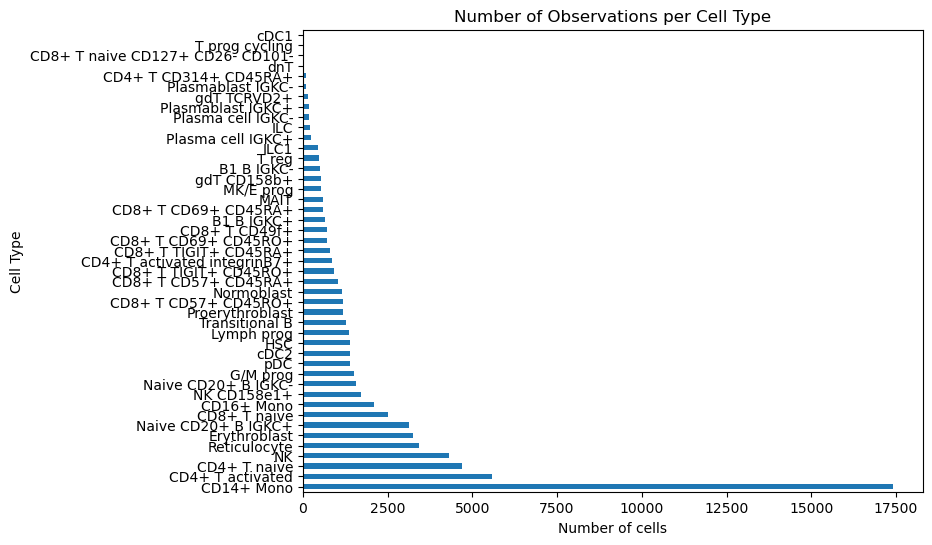

In [23]:

cell_counts = adata_train.obs["cell_type"].value_counts()
cell_counts.plot(kind="barh", figsize=(8, 6), title="Number of Observations per Cell Type")
plt.xlabel("Number of cells")
plt.ylabel("Cell Type")
plt.show()


In [25]:
cell_counts_per_donor = adata_train.obs.groupby(["DonorID", "cell_type"],observed=True).size().unstack(fill_value=0)

cell_counts_per_donor = cell_counts_per_donor[cell_counts_per_donor.sum().sort_values(ascending=False).index]
cell_counts_per_donor1 = cell_counts_per_donor



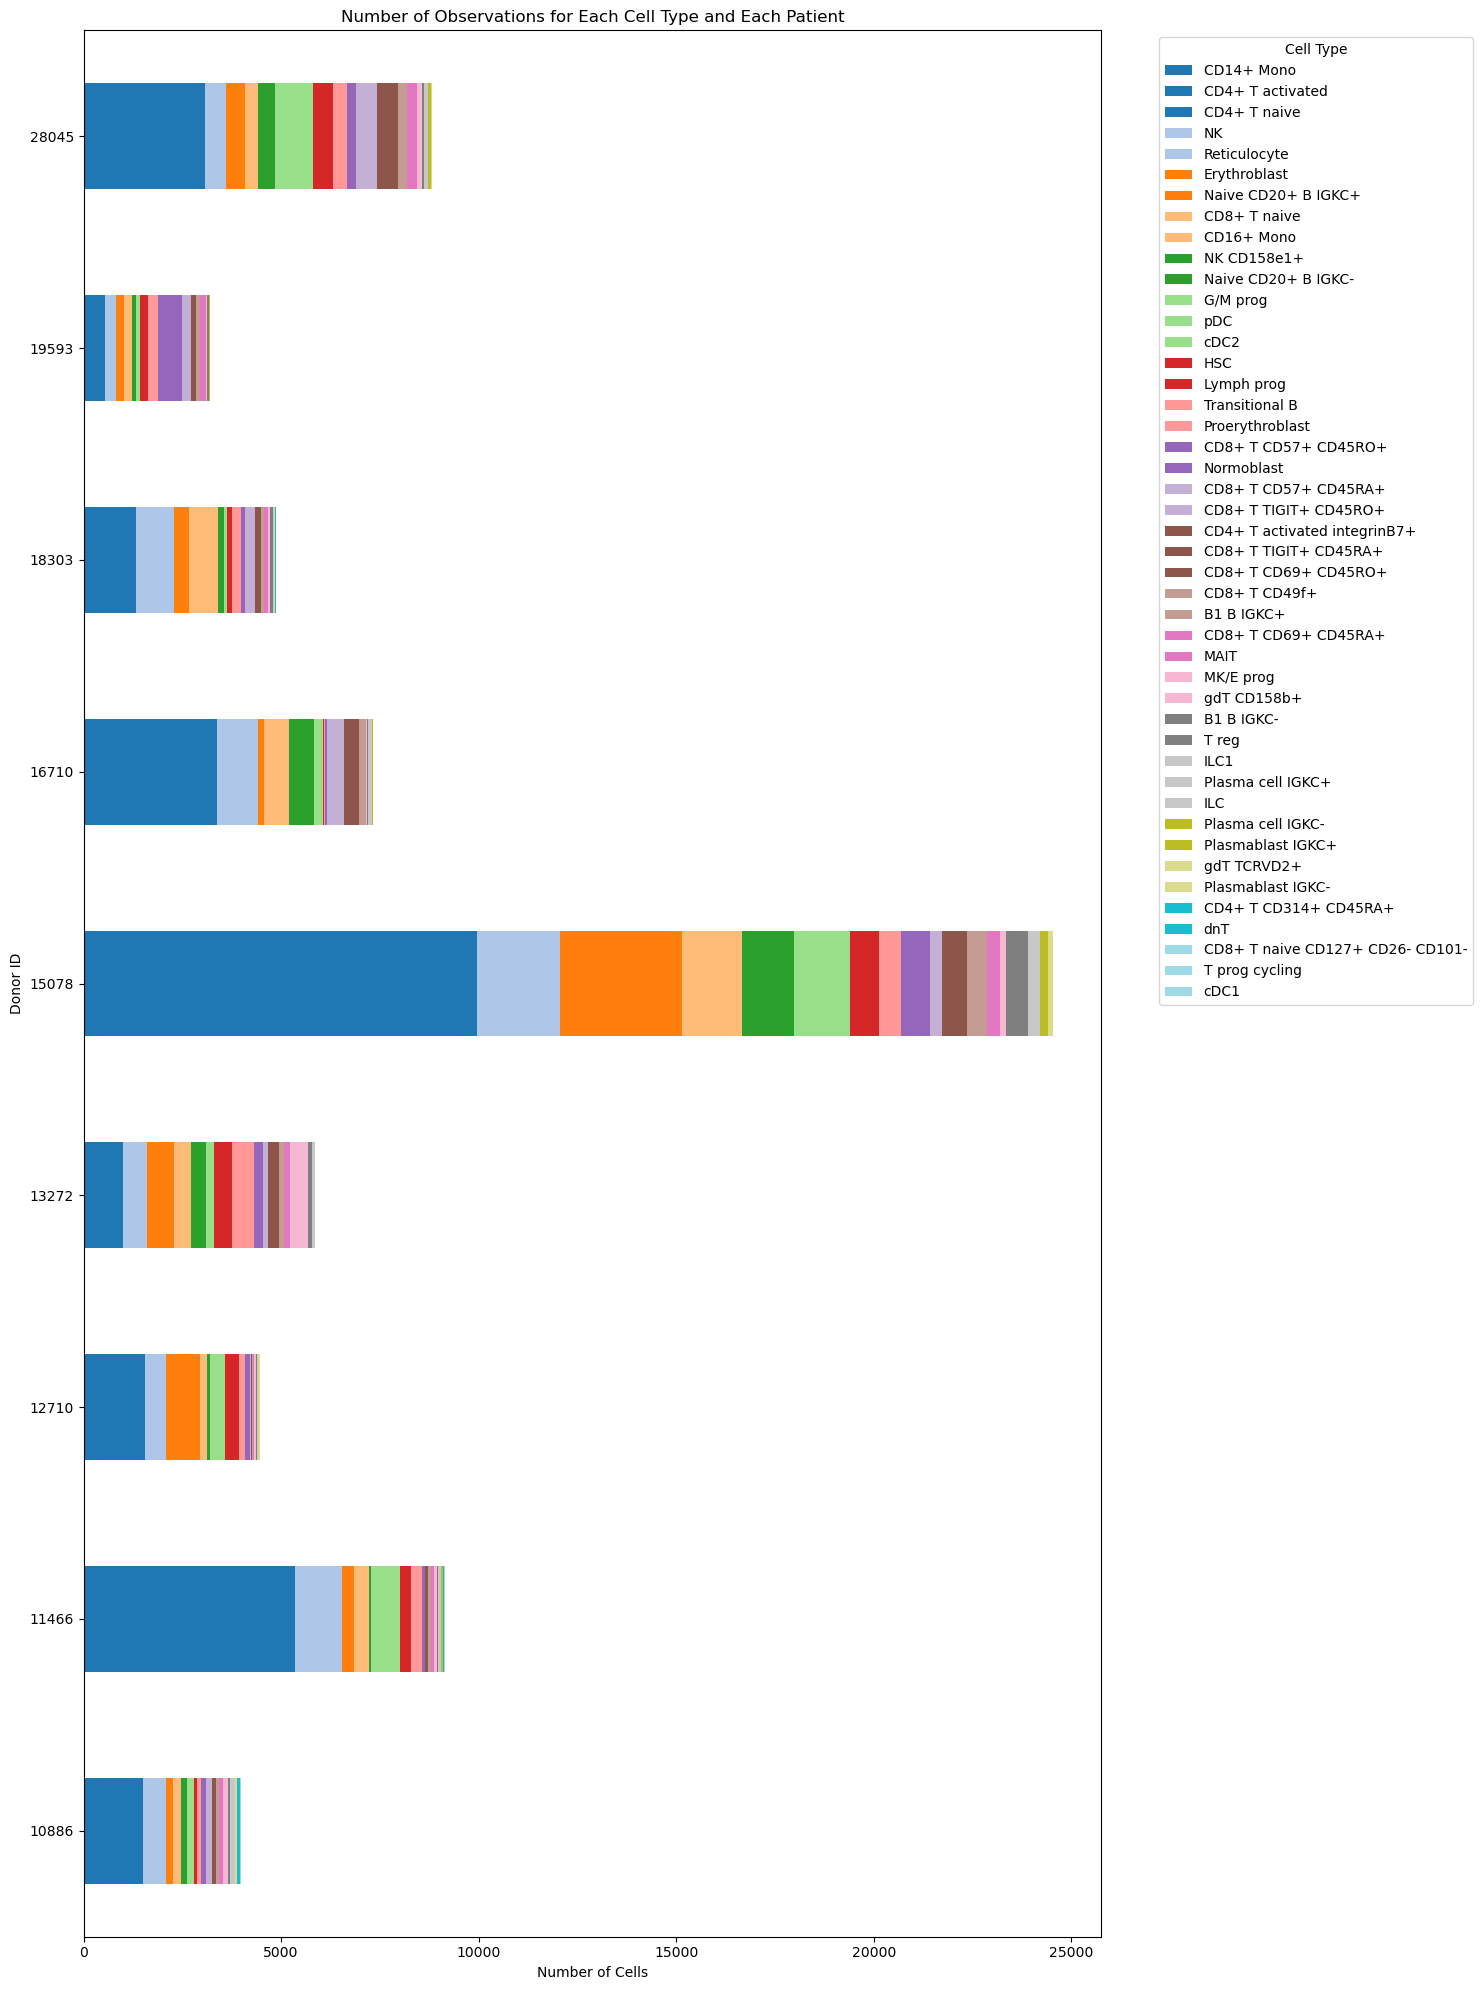

In [26]:
fig, ax = plt.subplots(figsize=(15, 20))
cell_counts_per_donor.plot(kind='barh', stacked=True, ax=ax, colormap="tab20")

plt.xlabel("Number of Cells")
plt.ylabel("Donor ID")
plt.title("Number of Observations for Each Cell Type and Each Patient")
plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


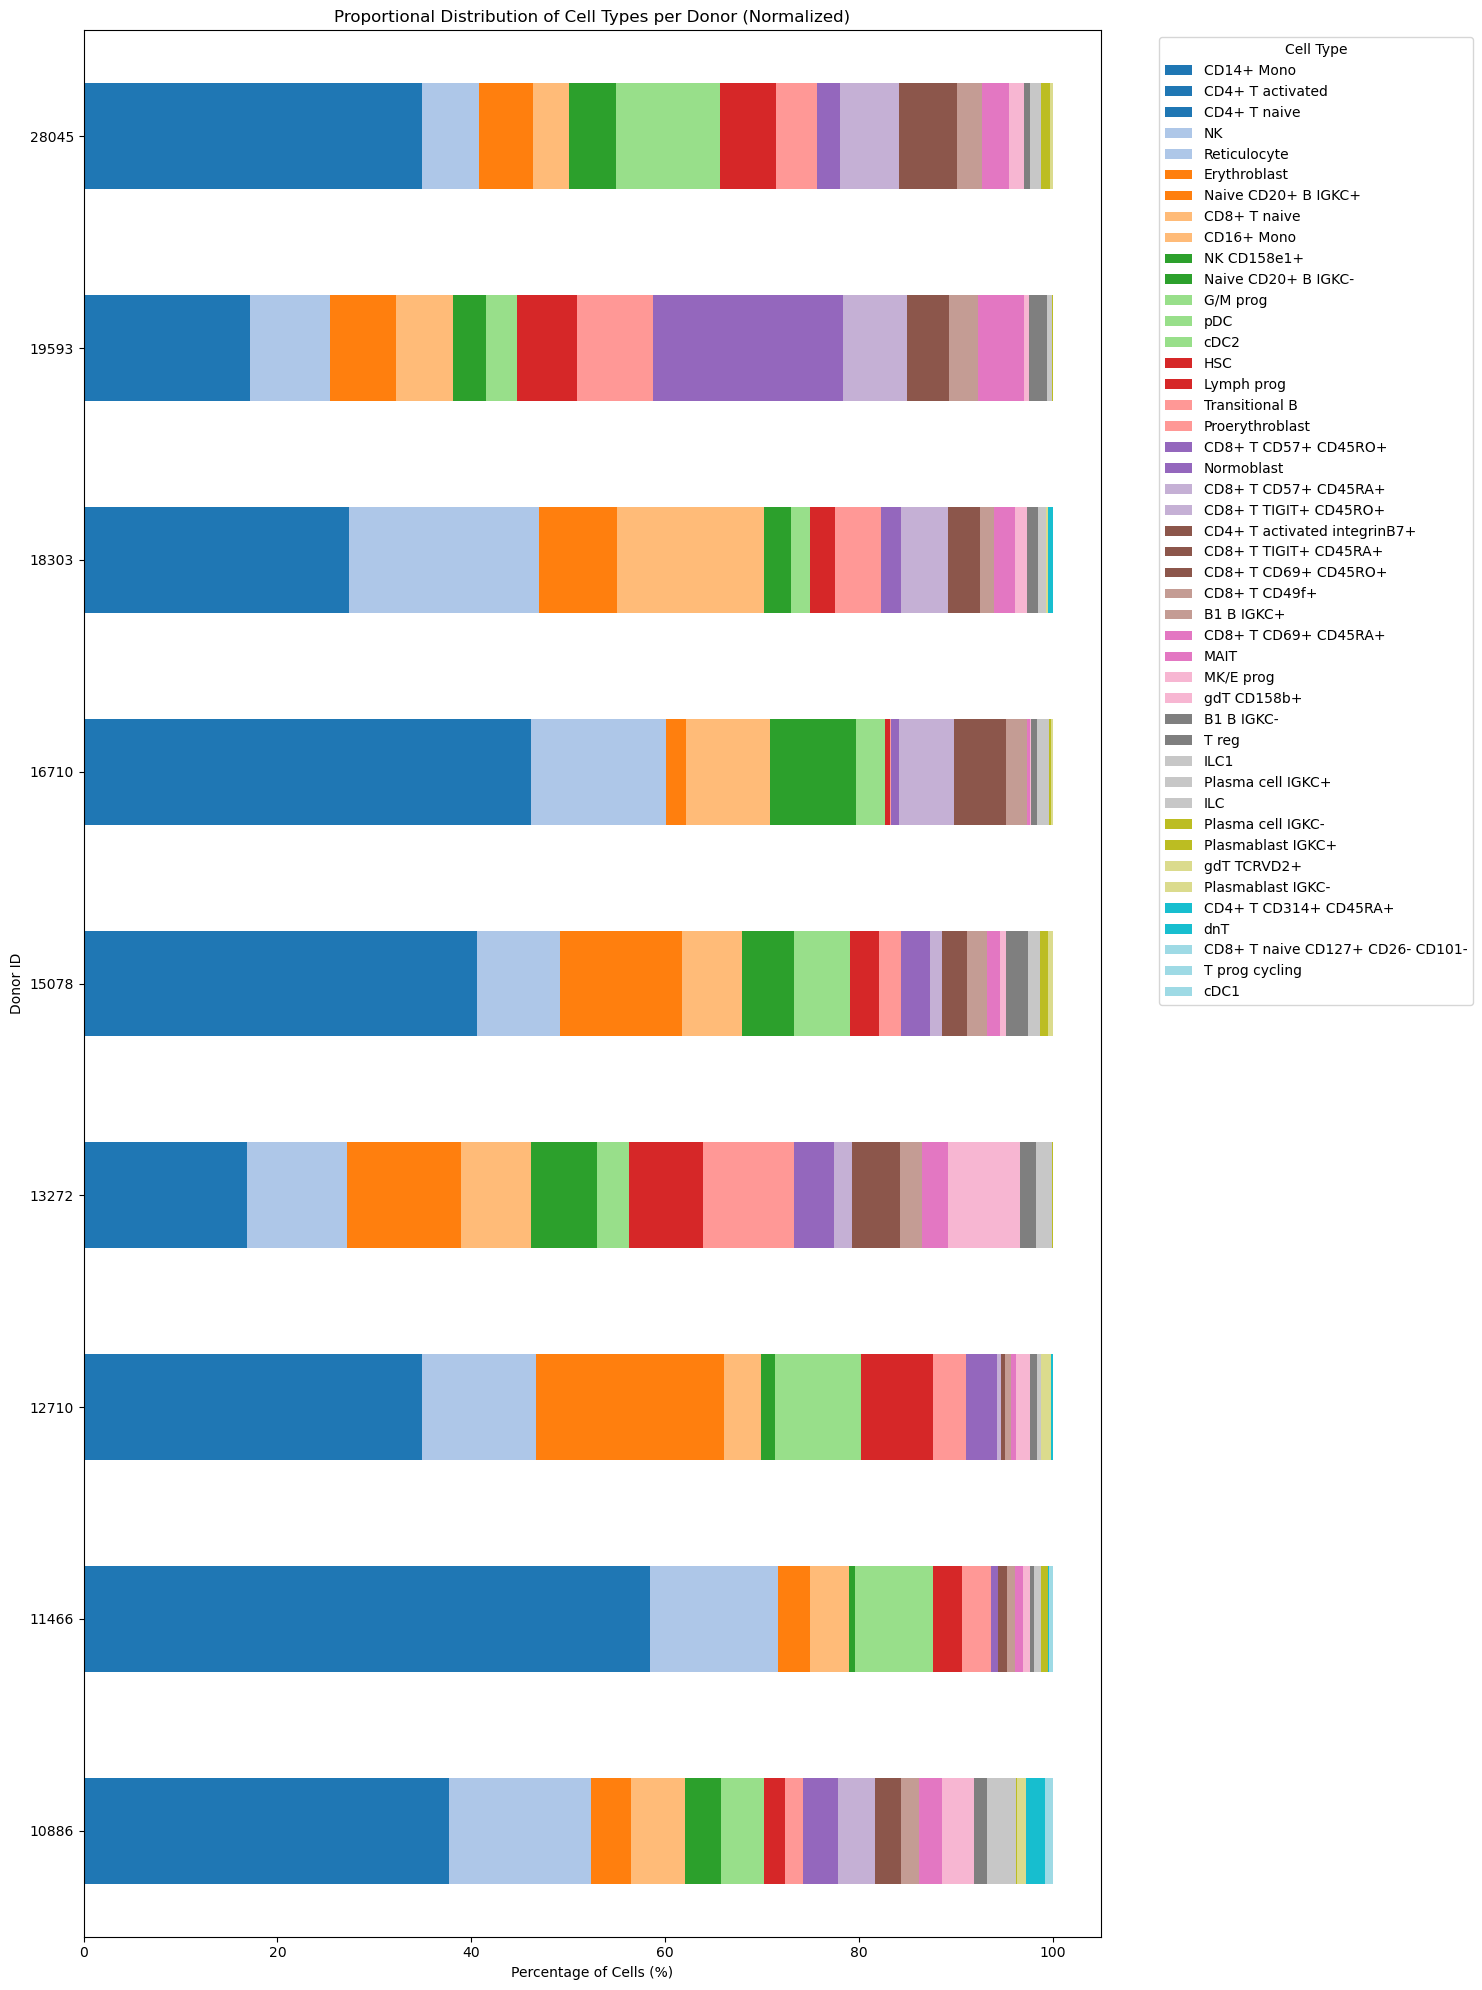

In [27]:
cell_counts_per_donor = adata_train.obs.groupby(["DonorID", "cell_type"],observed=True).size().unstack(fill_value=0)

sorted_cell_types = cell_counts_per_donor.sum().sort_values(ascending=False).index
cell_counts_per_donor = cell_counts_per_donor[sorted_cell_types]

# Normalize to percentages
cell_counts_per_donor = cell_counts_per_donor.div(cell_counts_per_donor.sum(axis=1), axis=0) * 100


fig, ax = plt.subplots(figsize=(15, 20))
cell_counts_per_donor.plot(kind="barh", stacked=True, ax=ax, colormap="tab20")

plt.xlabel("Percentage of Cells (%)")
plt.ylabel("Donor ID")
plt.title("Proportional Distribution of Cell Types per Donor (Normalized)")
plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.show()


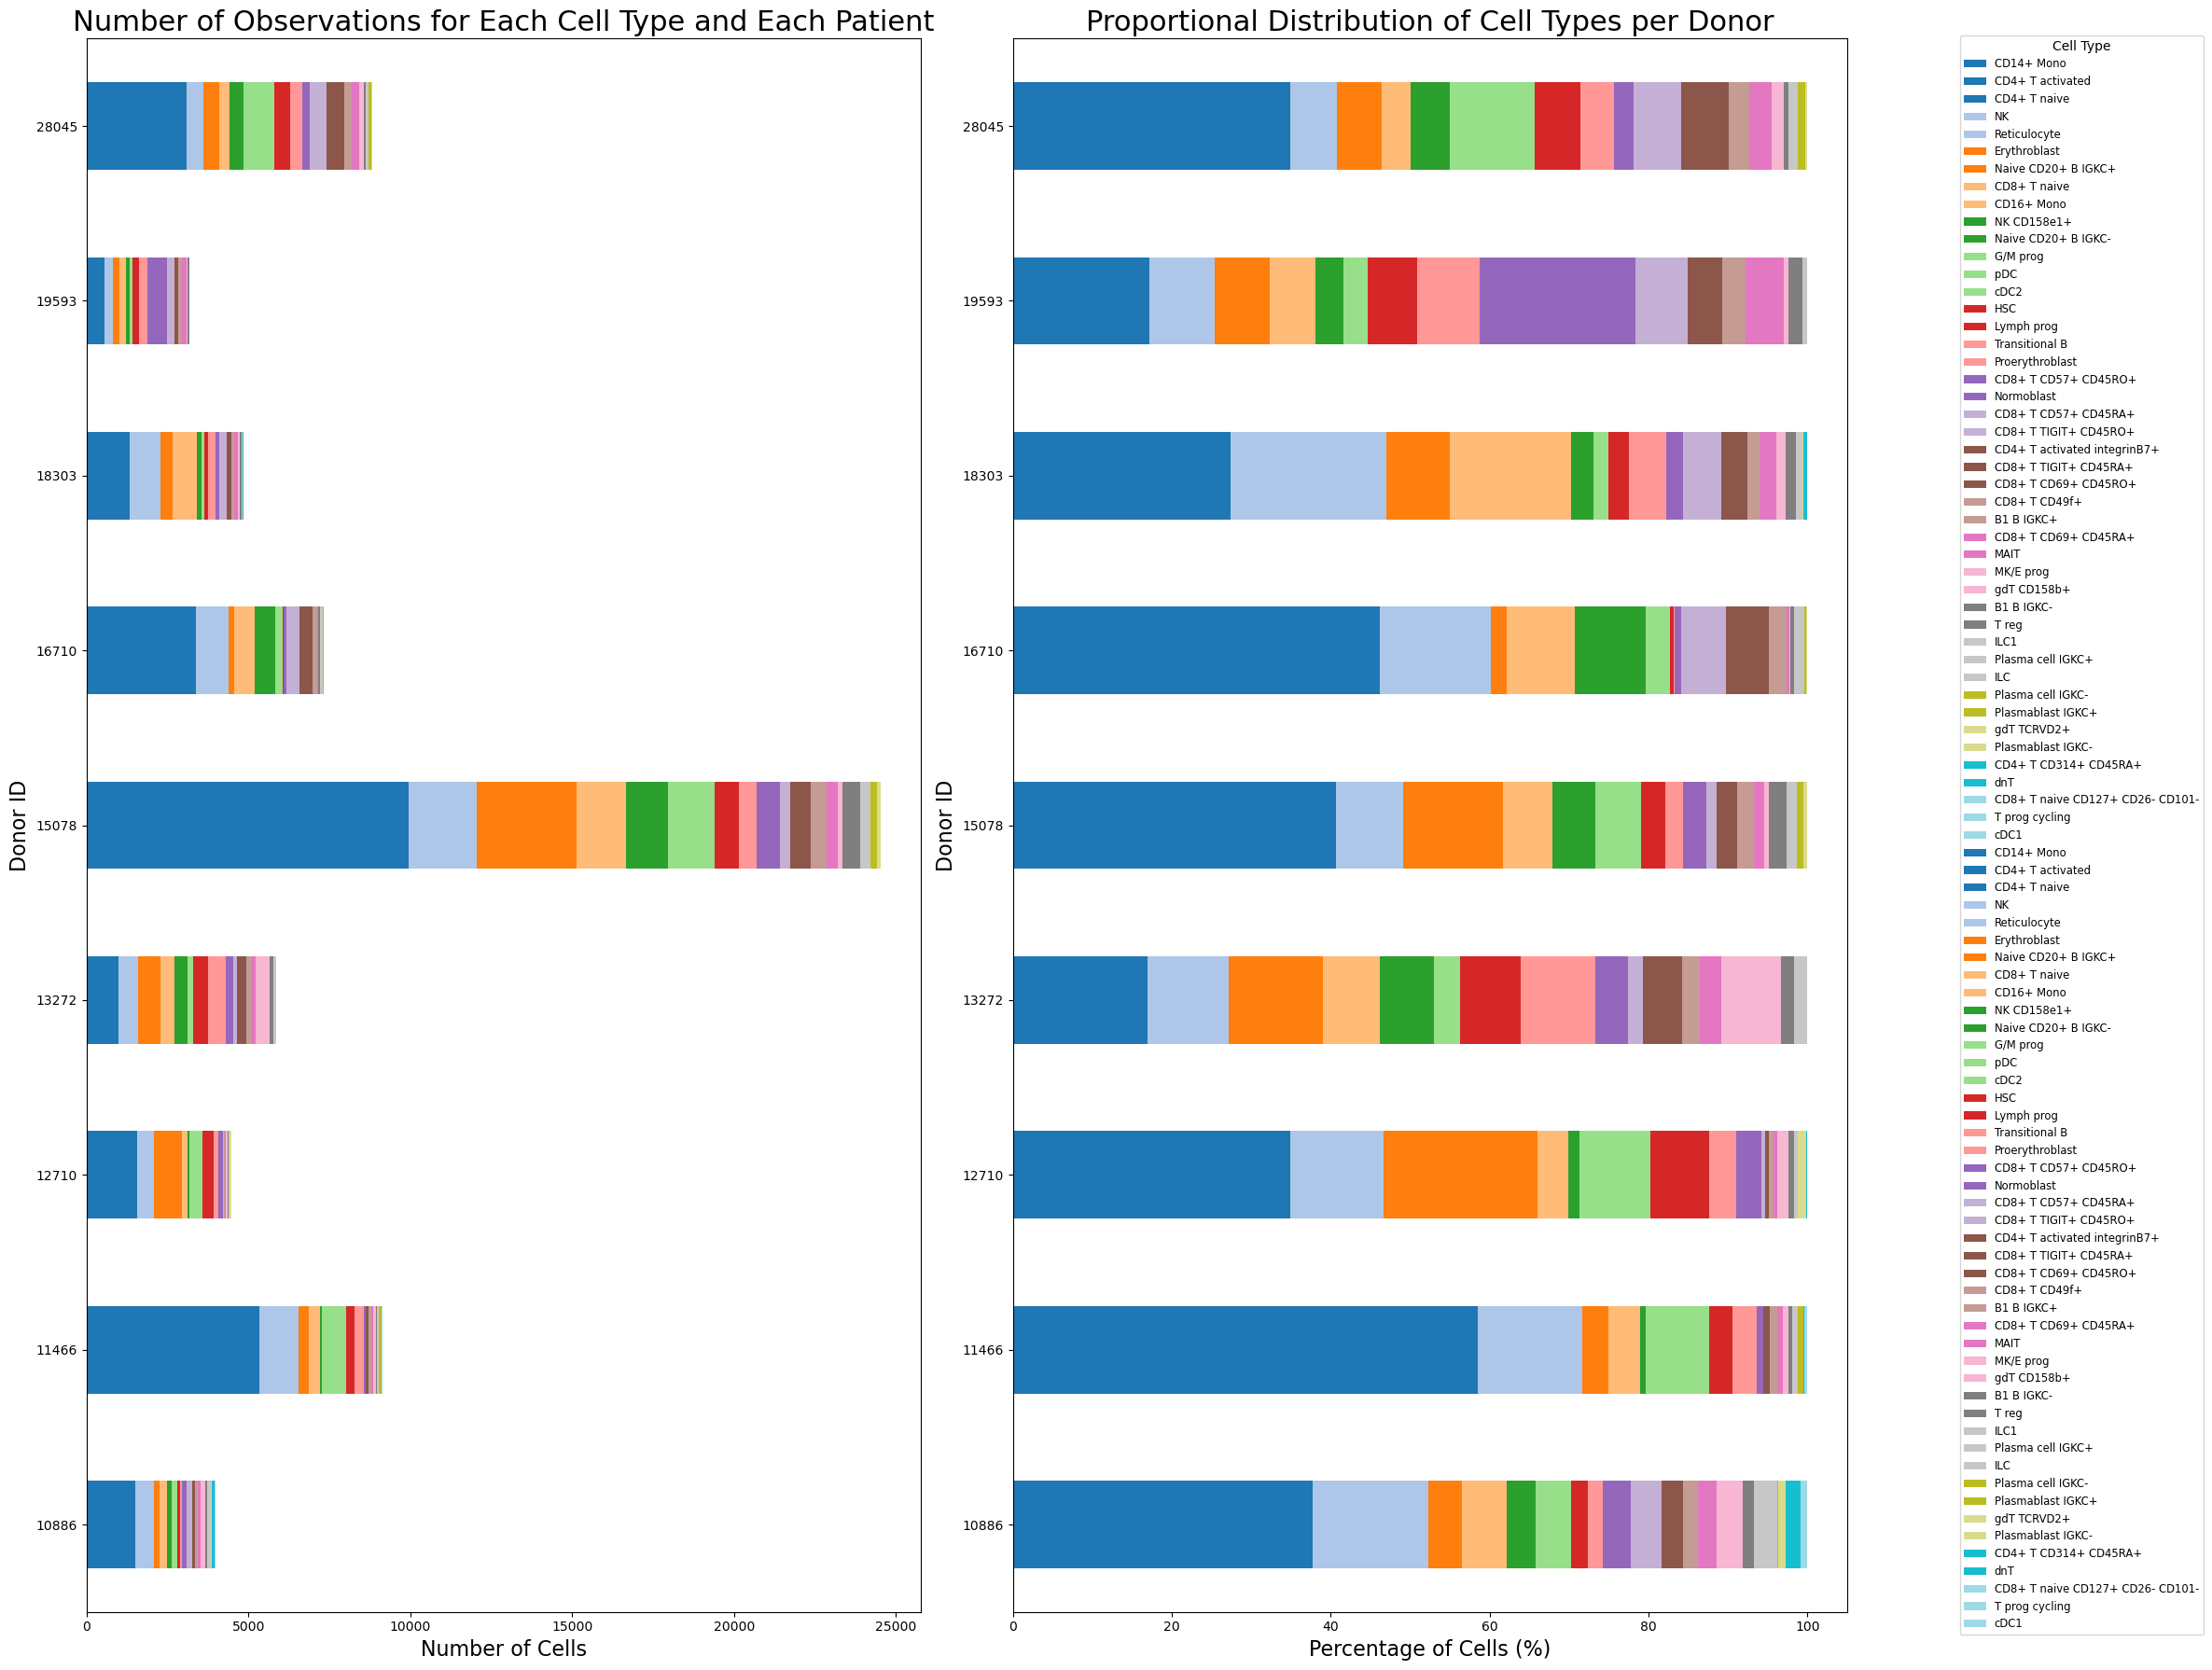

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 18))

# Plot 1: Bar plot of cell counts
cell_counts_per_donor1.plot(kind='barh', stacked=True, ax=axes[0], colormap="tab20")
axes[0].set_xlabel("Number of Cells", fontsize=16)
axes[0].set_ylabel("Donor ID", fontsize=16)
axes[0].set_title("Number of Observations for Each Cell Type and Each Patient", fontsize=22)

# Plot 2: Bar plot of normalized cell counts (percentages)
cell_counts_per_donor.plot(kind="barh", stacked=True, ax=axes[1], colormap="tab20")
axes[1].set_xlabel("Percentage of Cells (%)", fontsize=16)
axes[1].set_ylabel("Donor ID", fontsize=16)
axes[1].set_title("Proportional Distribution of Cell Types per Donor", fontsize=22)
for ax in axes:
    ax.get_legend().remove()

fig.legend(title="Cell Type", bbox_to_anchor=(1.05, 0.5), loc="center left", fontsize='small')

plt.tight_layout()
plt.show()

In [10]:
total_elements = adata_train.layers["counts"].shape[0] * adata_train.layers["counts"].shape[1]

nonzero_count = adata_train.layers["counts"].nnz
zero_count = total_elements - nonzero_count

print("Total elements:", total_elements)
print("Nonzero elements:", nonzero_count)
print("Zero elements:", zero_count)
print(f"Fraction of nonzero elements: {nonzero_count / total_elements:.2%}")


Total elements: 361040000
Nonzero elements: 32228572
Zero elements: 328811428
Fraction of nonzero elements: 8.93%


In [11]:
max_val = adata_train.layers["counts"].max()

In [12]:
max_val

np.float32(35451.0)

In [81]:
from scipy import ndimage
ndimage.histogram(adata_train.layers["counts"].data, 0, max_val, 25)


array([32217695,     3749,     2251,     1191,      827,      973,
            851,      522,      232,      105,       51,       39,
             26,       13,       11,        8,       10,        4,
              3,        3,        1,        3,        1,        0,
              3])

In [13]:
raw_counts = adata_train.layers["counts"].data
processed_counts = adata_train.X.data

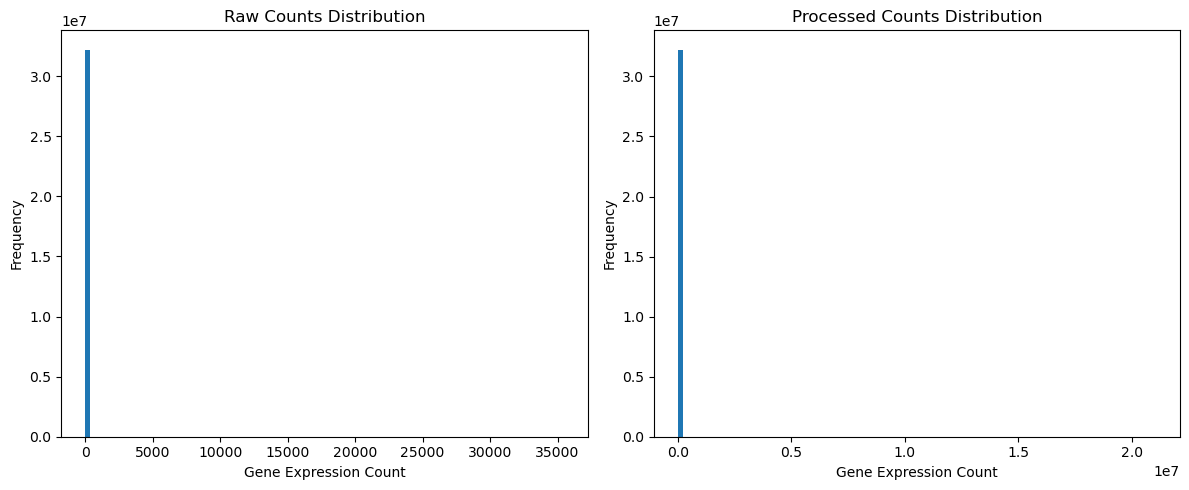

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(raw_counts, bins=100)
plt.title("Raw Counts Distribution")
plt.xlabel("Gene Expression Count")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(processed_counts, bins=100)
plt.title("Processed Counts Distribution")
plt.xlabel("Gene Expression Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


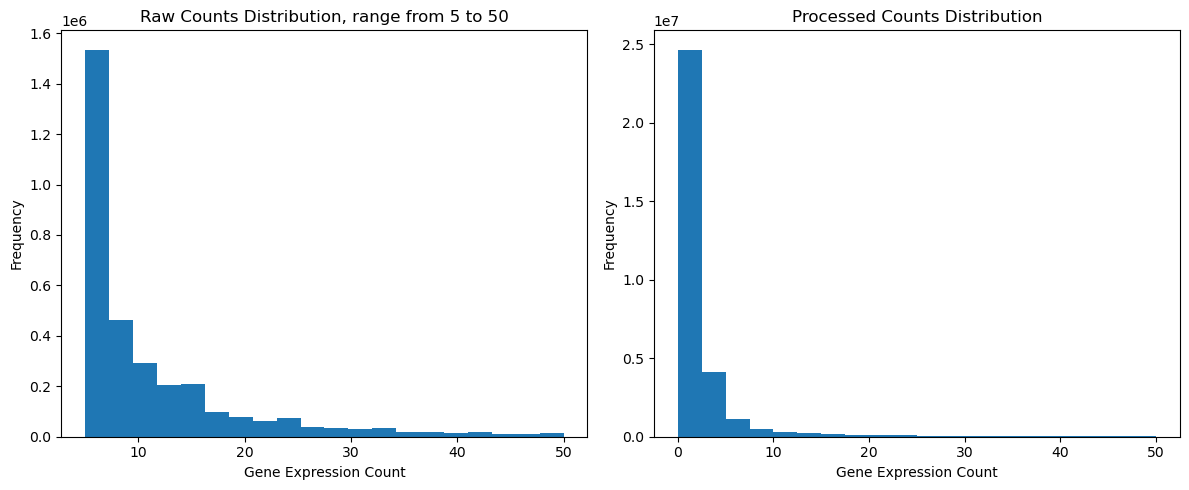

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(raw_counts,range=(5, 50), bins=20)
plt.title("Raw Counts Distribution, range from 5 to 50")
plt.xlabel("Gene Expression Count")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(processed_counts,range=(0, 50), bins=20)
plt.title("Processed Counts Distribution")
plt.xlabel("Gene Expression Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [18]:
print("Raw: \nMin:", raw_counts.min(), "Max:", raw_counts.max(),
      "Mean:", raw_counts.mean(), "SD:", raw_counts.std())
print("Preprocessed: \nMin:", processed_counts.min(),
      "Max:", processed_counts.max(), "Mean:", processed_counts.mean(),
      "SD:", processed_counts.std())


Raw: 
Min: 1.0 Max: 35451.0 Mean: 4.9526963 SD: 114.22376
Preprocessed: 
Min: 0.104286805 Max: 21078940.0 Mean: 38.395397 SD: 4813.9


In [17]:
raw_mtx = adata_train.layers["counts"]
processed_mtx = adata_train.X

In [72]:
scran = adata_train.layers["counts"] / adata_train.obs["GEX_size_factors"].values[:, None]

print("Preprocessed: \nMin:", scran.data.min(),
      "Max:", scran.data.max(), "Mean:", scran.data.mean(),
      "SD:", scran.data.std())


Preprocessed: 
Min: 0.06848195606168732 Max: 9380451.144910825 Mean: 74.3647109886951 SD: 2594.442999168815


In [24]:
adata_train.obs['GEX_size_factors']

AGTTCCCAGCACCTGC-1-s3d1    1.371097
CAGATTGCAAAGGCAC-1-s2d1    2.426149
GTCATGACAATTTCCT-1-s1d2    0.854908
TCATCCGCACTTGGCG-1-s2d5    1.387475
AGTGCCGGTCATCAGT-1-s2d5    0.520903
                             ...   
AGTCATGAGGTTTACC-1-s3d7    0.616979
GTGAGCCTCGCAGATT-1-s2d1    3.336449
GTCATTTTCCATTGCC-1-s2d1    1.473857
CGCATGGAGAACCCGA-1-s1d1    0.039444
TGGGAGATCCTCTGCA-1-s4d1    2.535835
Name: GEX_size_factors, Length: 72208, dtype: float64

In [26]:
adata = adata_train.copy()
adata.X = adata_train.layers["counts"]

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)


In [27]:
print("Preprocessed: \nMin:", adata.X.data.min(),
      "Max:", adata.X.data.max(),
      "Mean:", adata.X.data.mean(),
      "SD:", adata.X.data.std())


Preprocessed: 
Min: 0.016852878 Max: 6.8536944 Mean: 0.79530835 SD: 0.6292188


In [68]:
adata = adata_train.copy()

size_factors = adata.obs['GEX_size_factors']

adata.X = adata.layers["counts"].multiply(1 /  size_factors.values.reshape(-1, 1))  
sc.pp.log1p(adata)

print("Preprocessed: \nMin:", adata.X.data.min(),
      "Max:", adata.X.data.max(),
      "Mean:", adata.X.data.mean(),
      "SD:", adata.X.data.std())

Preprocessed: 
Min: 0.06623890846712618 Max: 16.054138522902853 Mean: 2.8342638645708074 SD: 1.3783363556082433


In [65]:
size_factors.values.reshape(-1, 1)

array([[1.37109694],
       [2.42614937],
       [0.85490819],
       ...,
       [1.47385704],
       [0.03944441],
       [2.53583465]])

In [49]:
adata.obs['GEX_size_factors'].min()

np.float64(0.0001964520088865306)

In [29]:
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE194nnn/GSE194122/suppl/GSE194122%5Fopenproblems%5Fneurips2021%5Fcite%5FBMMC%5Fprocessed.h5ad.gz

'wget' is not recognized as an internal or external command,
operable program or batch file.


When working with scRNA-Seq data, raw counts obtained experimentally need to be transformed for further analysis. Usually, the data is normalized using different methods (median count depth in basic Scanpy workflow, linear models using negative binomial distribution, bayesian and others) and log transformed.

In [30]:
!gunzip GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad.gz

'gunzip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
adata_orig = ad.read_h5ad("GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad")


c:\Users\krzys\Desktop\sad\projekt2\.conda\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [33]:
adata_orig

AnnData object with n_obs × n_vars = 90261 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [34]:
raw_mtx = adata_orig.layers["counts"]
processed_mtx = adata_orig.X
print("Raw: \nMin:", raw_mtx.data.min(), "Max:", raw_mtx.data.max(),
      "Mean:", raw_mtx.data.mean(), "SD:", raw_mtx.data.std())
print("Preprocessed: \nMin:", processed_mtx.data.min(),
      "Max:", processed_mtx.data.max(), "Mean:", processed_mtx.data.mean(),
      "SD:", processed_mtx.data.std())


Raw: 
Min: 1.0 Max: 35451.0 Mean: 5.4647655 SD: 79.467384
Preprocessed: 
Min: 0.012476851 Max: 21078940.0 Mean: 13.447416 SD: 2380.5764


In [35]:
scran = adata_orig.layers["counts"] / adata_orig.obs["GEX_size_factors"].values[:, None]
adata_orig.layers["scran_normalization"] = scipy.sparse.csr_matrix(sc.pp.log1p(scran))


In [37]:
print("Preprocessed: \nMin:", adata_orig.layers["scran_normalization"].data.min(),
      "Max:", adata_orig.layers["scran_normalization"].data.max(), "Mean:", adata_orig.layers["scran_normalization"].data.mean(),
      "SD:", adata_orig.layers["scran_normalization"].data.std())


Preprocessed: 
Min: 0.09919970127121433 Max: 16.86378501705523 Mean: 1.1535572290682379 SD: 0.9106805322110113


In [3]:
scran = adata_orig.layers["counts"] / adata_orig.obs["GEX_size_factors"].values[:, None]

print("Preprocessed: \nMin:", scran.data.min(),
      "Max:", scran.data.max(), "Mean:", scran.data.mean(),
      "SD:", scran.data.std())


Preprocessed: 
Min: 0.10428680501928626 Max: 21078939.44923625 Mean: 20.12889734647991 SD: 2518.637977321213


In [4]:
adata_orig.layers["scran"] = scipy.sparse.csr_matrix(scran)


In [40]:
adata_orig

AnnData object with n_obs × n_vars = 90261 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts', 'scran_normalization', 'scran'

In [7]:
#adata_top = adata_orig.copy()
sc.pp.normalize_total(adata_orig)
sc.pp.log1p(adata_orig)



In [8]:
sc.pp.highly_variable_genes(adata_orig, n_top_genes=5000)


In [11]:
adata_orig.layers["scran"]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 141495252 stored elements and shape (90261, 14087)>

In [12]:
subset_adata = adata_orig[:, adata_orig.var["highly_variable"]]

In [15]:
print("Preprocessed: \nMin:", subset_adata.layers["scran"].data.min(),
      "Max:", subset_adata.layers["scran"].data.max(), "Mean:", 
      subset_adata.layers["scran"].data.mean(),
      "SD:", subset_adata.layers["scran"].data.std())

Preprocessed: 
Min: 0.10428680501928626 Max: 21078939.44923625 Mean: 35.56542314978266 SD: 4273.492477388558



### Task 2: **VAE implementation** (3 points)  

In this task you will implement Variational Autoencoder (Gaussian VAE) that can be trained on scRNA-seq data. The input and output should be the gene expression matrix (in this case a batch would consist of transcriptomic profiles for a subset of cells).

Remember that VAE needs to have a **stochastic Encoder** and **Decoder** and be trained with a **probabilistic loss**.

>**Notation**:
* $Z$ is a latent space
* $p(z)$ is *prior distribution* over the latent space
* $E(x)$ is an encoder
* $\phi$ are encoder network weights
* $D(z)$ is a decoder
* $\theta$ are decoder network weights

1. Implement `Encoder` and `Decoder` class in such a way that number of hidden layers, their sizes as well as size of latent space can be changed (you will need this to select the best size for the latent space). Each of them needs to have their `forward` method. Explain in your report what is output of Encoder and Decoder network in term of distributions (*Hint*: What are $q_\phi(z | x)$ and $p_\theta(x | z)$?)

2. Explain what *reparametrization trick* is. How and why is it used? Provide the mathematical formula and reasoning why it works.

3. Implement `VariationalAutoEncoder`class that combines `Encoder` and `Decoder` and includes:

  1. `reparameterize` method that implements *reparametrization trick* according to the formula from point 2.
  2. `sample_latent` method which accepts the original transcriptomic profile as input and outputs samples from the approximate posterior distribution $q_\phi(z|x)$.

---


In [60]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 

class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_layers, latent_dim):
        super(Encoder, self).__init__()
        layers = []
        prev_dim = input_dim
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))  # Add batch normalization
            layers.append(nn.ReLU())
            prev_dim = hidden_dim
        self.hidden_layers = nn.Sequential(*layers)
        self.fc_mu = nn.Linear(prev_dim, latent_dim)
        self.fc_logvar = nn.Linear(prev_dim, latent_dim)
    
    def forward(self, x):
        h = self.hidden_layers(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar  # qϕ(z|x)

class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_layers, output_dim):
        super(Decoder, self).__init__()
        layers = []
        prev_dim = latent_dim
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))  # Add batch normalization
            layers.append(nn.ReLU())
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, output_dim))
        layers.append(nn.ReLU())
        self.hidden_layers = nn.Sequential(*layers)
    
    def forward(self, z):
        return self.hidden_layers(z)  # pθ(x|z)

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_layers, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, hidden_layers, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_layers[::-1], input_dim)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def sample_latent(self, x):
        mu, logvar = self.encoder(x)
        return self.reparameterize(mu, logvar)
    
    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar

# Kullback-Leibler divergence
def KL_divergence(mu, logvar):
    return -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

# ELBO
def ELBO(recon_x, x, mu, logvar):
    recon_loss = F.mse_loss(recon_x, x, reduction='sum')  # Reconstruction loss
    kl_loss = KL_divergence(mu, logvar)  # KL 
    return recon_loss + kl_loss

In [68]:
n_samples = 1000
indices = np.random.choice(adata_train.n_obs, size=n_samples, replace=False)
sampled_adata = adata_train[indices]

In [69]:
n_samples = 1000
indices = np.random.choice(adata_train.n_obs, size=n_samples, replace=False)
sampled_test = adata_train[indices]

Epoch 1, Loss: 413.49628271484374
Epoch 2, Loss: 92.1277353515625
Epoch 3, Loss: 85.06768872070313
Epoch 4, Loss: 82.24621850585937
Epoch 5, Loss: 80.31124267578124
Epoch 6, Loss: 78.88715771484375
Epoch 7, Loss: 78.3260498046875
Epoch 8, Loss: 77.39335009765625
Epoch 9, Loss: 77.156302734375
Epoch 10, Loss: 76.71458276367187
Epoch 11, Loss: 76.27596533203125
Epoch 12, Loss: 76.1896650390625
Epoch 13, Loss: 76.0810634765625
Epoch 14, Loss: 75.55216796875
Epoch 15, Loss: 75.46211254882813
Epoch 16, Loss: 75.03500561523437
Epoch 17, Loss: 75.07285205078125
Epoch 18, Loss: 74.748525390625
Epoch 19, Loss: 74.55340771484374
Epoch 20, Loss: 74.62671508789063
Epoch 21, Loss: 74.39210546875
Epoch 22, Loss: 74.03077612304688
Epoch 23, Loss: 74.32069287109375
Epoch 24, Loss: 74.25704809570313
Epoch 25, Loss: 74.020693359375
Epoch 26, Loss: 74.14422583007813
Epoch 27, Loss: 73.65837963867187
Epoch 28, Loss: 73.89427978515624
Epoch 29, Loss: 73.5476298828125
Epoch 30, Loss: 73.582626953125
Epoch 3

In [88]:
def prepare_dataset(expdata, normalize=True):
    
    X = expdata.toarray()

    if normalize:

        X_mean = X.mean(axis=0)
        X_std = X.std(axis=0) + 1e-8  # Prevent division by zero
        X = (X - X_mean) / X_std

    X = torch.tensor(X, dtype=torch.float32)
    dataset = TensorDataset(X)
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    return dataloader


def train_vae(vae, dataloader, optimizer, description):
    vae.train()
    loss_keeper = []
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in dataloader:
            if isinstance(batch, ad.experimental.multi_files._anncollection.AnnCollectionView):
                batch = batch.X
            x = batch[0]
            optimizer.zero_grad()
            recon_x, mu, logvar = vae(x)
            loss = ELBO(recon_x, x, mu, logvar)
            '''
            # Check for NaN values in loss
            if torch.isnan(loss):
                print("NaN loss detected")
                print(f"recon_x: {recon_x}")
                print(f"x: {x}")
                print(f"mu: {mu}")
                print(f"logvar: {logvar}")
                break
            '''
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(dataloader.dataset)}")
        loss_keeper.append(total_loss / len(dataloader.dataset))
    return loss_keeper

def evaluate_vae(vae, dataloader, description):
    vae.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in dataloader:
            x = batch[0]
            recon_x, mu, logvar = vae(x)
            loss = ELBO(recon_x, x, mu, logvar)
            total_loss += loss.item()
    print(f"{description} - Loss: {total_loss / len(dataloader.dataset)}")



'''
sc.pp.normalize_total(sampled_adata)
sc.pp.log1p(sampled_adata)
'''

expdata = sampled_adata.X
dataloader = prepare_dataset(expdata)

# Initialize the model, optimizer, and loss function
input_dim = expdata.shape[1]
hidden_layers = [512, 256]
latent_dim = 64
vae = VAE(input_dim, hidden_layers, latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)
num_epochs = 30

train_vae(vae, dataloader, optimizer, "Training")

torch.save(vae.state_dict(), "vae_model.pth")
expdata = sampled_test.X
X = prepare_dataset(expdata)
dataloader = X


evaluate_vae(vae, dataloader, "Training")

Epoch 1, Loss: 5043.729578125
Epoch 2, Loss: 4969.546296875
Epoch 3, Loss: 4953.269171875
Epoch 4, Loss: 4942.218484375
Epoch 5, Loss: 4934.46275
Epoch 6, Loss: 4929.468625
Epoch 7, Loss: 4921.244421875
Epoch 8, Loss: 4913.612984375
Epoch 9, Loss: 4906.065109375
Epoch 10, Loss: 4899.18140625
Epoch 11, Loss: 4892.438234375
Epoch 12, Loss: 4885.451453125
Epoch 13, Loss: 4877.905984375
Epoch 14, Loss: 4875.4355625
Epoch 15, Loss: 4866.83696875
Epoch 16, Loss: 4861.31096875
Epoch 17, Loss: 4854.300921875
Epoch 18, Loss: 4843.09303125
Epoch 19, Loss: 4841.952703125
Epoch 20, Loss: 4834.361125
Epoch 21, Loss: 4827.769453125
Epoch 22, Loss: 4824.256
Epoch 23, Loss: 4826.169953125
Epoch 24, Loss: 4821.793640625
Epoch 25, Loss: 4814.41071875
Epoch 26, Loss: 4812.81278125
Epoch 27, Loss: 4806.10828125
Epoch 28, Loss: 4801.653546875
Epoch 29, Loss: 4796.339453125
Epoch 30, Loss: 4794.200515625
Training - Loss: 4821.326265625


In [79]:
for abtch in train_dataloader2:
    print(batch)

[tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0977, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.6867, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.9202, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.9313, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.1069, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.9131, 0.0000]])]
[tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0977, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.6867, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.9202, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.9313, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.1069, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.9131, 0.0000]])]
[tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0977, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.6867, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.9202, 0.0000],
       

In [63]:
sampled_adata

AnnData object with n_obs × n_vars = 1000 × 5000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p'
    layers: 'counts', 'counts_processed'

In [72]:
expdata = sampled_adata.X
dataloader = prepare_dataset(expdata)

# Initialize the model, optimizer, and loss function
input_dim = expdata.shape[1]
hidden_layers = [512, 256]
latent_dim = 64
vae = VAE(input_dim, hidden_layers, latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=1e-5)
num_epochs = 30

train_vae(vae, dataloader, optimizer, "Training")


Epoch 1, Loss: 5390.40028125
Epoch 2, Loss: 5349.785625
Epoch 3, Loss: 5314.7690625
Epoch 4, Loss: 5282.769359375
Epoch 5, Loss: 5256.188671875
Epoch 6, Loss: 5230.708140625
Epoch 7, Loss: 5209.529671875
Epoch 8, Loss: 5190.352453125
Epoch 9, Loss: 5174.046453125
Epoch 10, Loss: 5157.575828125
Epoch 11, Loss: 5143.212109375
Epoch 12, Loss: 5131.15184375
Epoch 13, Loss: 5120.40153125
Epoch 14, Loss: 5110.7660625
Epoch 15, Loss: 5100.159453125
Epoch 16, Loss: 5092.8409375
Epoch 17, Loss: 5085.211546875
Epoch 18, Loss: 5075.546484375
Epoch 19, Loss: 5069.995328125
Epoch 20, Loss: 5064.69896875
Epoch 21, Loss: 5058.660328125
Epoch 22, Loss: 5052.5258125
Epoch 23, Loss: 5047.883671875
Epoch 24, Loss: 5041.920828125
Epoch 25, Loss: 5038.2249375
Epoch 26, Loss: 5032.9704375
Epoch 27, Loss: 5028.878765625
Epoch 28, Loss: 5024.808140625
Epoch 29, Loss: 5018.693828125
Epoch 30, Loss: 5016.619359375


### Task 3: **Kullback-Leibler divergence and ELBO** (3 points)

1. Explain what Kullback-Leibler divergence is and how it is in connected to VAE.

2. What is reconstruction loss? What should be the reconstruction loss in our case? Include a formula in the report.

3. What is ELBO? How is it connected to VAE? How is KL divergence connected to ELBO? How can ELBO be used to approximate $q_\phi(z | x)$ (math!)?

4. Implement `KL_divergence` function that computes the Kullback-Leibler divergence between $q_\phi(z | x)$ and $p(z)$. What is the assumed prior distribution of latent space $p(z)$ in Gaussian VAE? Include the formula your implementation is based on in your report.

5. Implement `ELBO` function. Include the formula your implementation is based on in your report.
  - *Hint 1*: See Appendix B from VAE paper: Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014, https://arxiv.org/abs/1312.6114,
  - *Hint 2*: Use the `KL_divergence` function from previous point.

6. ( *Optional* ) What is $\beta$-VAE? Explain how it differs from Vanilla VAE (math). Give an example (problem type, data type etc), where $\beta$-VAE would be better suited than Vanilla VAE. Give an example where it might not. Explain why.

---

### Task 4: **VAE training, latent space exploration and model selection** (4 points)

1. Prepare three pairs of training and testing datasets.

  1. raw count matrix (`adata.layers['counts']`)
  2. provided preprocessed matrix (`adata.X`)
  3. matrix processed as suggested in Task 1 point 5 (*Hint*: Copy matrix you will be processing further and save it in `adata.layers['counts_processed']`)

  For loading datsets for training and testing, [AnnLoader](https://anndata.readthedocs.io/en/latest/generated/anndata.experimental.AnnLoader.html) might be helpful.

2. Select a few different VAE architectures (that's where implementation from Task 2 point 1 comes in handy). Check at least 3 different sizes of latent space.

3. Train VAE models (different architectures and datasets). Note that testing dataset is in fact validation dataset and is used during training process.
  1. Verify the training procedure by showing learning curves. A learning curve for VAE usually plots the $-ELBO$ against epoch number.
  2. Break down $ELBO$ according to its decomposition and plot both losses separately.
    - *Hint 1.* What is reconstruction and regularization loss in VAE?
    - *Hint 2.* See Task 3 point 3 and 5.

4. Create a table showing different latent space sizes and different datasets and report the $-ELBO$, reconstruction and regularization loss on the test dataset for each model. Comment on the results.

5. Visualize latent space using t-SNE, UMAP or PCA.

  1. Explain which method you have chosen and how it works (no need for math, explain the intuition). You can visualize the sample from testing dataset, not the whole dataset, if the plots are hard to read.
  2. Color the plots by `adata.obs.cell_type`.
  3. Inspect those visualizations and comment on the results.

6. Select the final model. Explain the decision making process behind choosing the dataset and model's architecture (size of latent space). (*Hint*: Combine your observations from point 3 and 4 and come up with the consclusion.)

7. Visualize latent space of the selected model and color it by `adata.obs.DonorNumber`, `adata.obs.batch` and `adata.obs.Site`. Discuss what you see and include the figures in your report. (*Hint:* What are the batch effects?)

8. Compare visualization of latent space of your final model with selected dimentionality reduction method used on final test dataset. Color it by `adata.obs.cell_type`, `adata.obs.DonorNumber`, `adata.obs.batch` and `adata.obs.Site`. You can do it using [Scanpy](https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html): [t-SNE](https://scanpy.readthedocs.io/en/stable/api/generated/scanpy.pl.tsne.html), [UMAP](https://scanpy.readthedocs.io/en/stable/api/generated/scanpy.pl.umap.html), [PCA](https://scanpy.readthedocs.io/en/stable/api/generated/scanpy.pl.pca.html). Compare and comment on the results.

---

In [5]:
adata_train

AnnData object with n_obs × n_vars = 72208 × 5000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'
    layers: 'counts'

In [9]:
mod = sc.experimental.pp.normalize_pearson_residuals(adata_train, layer = 'counts', copy = True)

In [11]:
sc.pp.normalize_total(mod)
sc.pp.log1p(mod)


In [15]:
mod_test = sc.experimental.pp.normalize_pearson_residuals(adata_test, layer = 'counts', copy = True)
sc.pp.normalize_total(mod_test)
sc.pp.log1p(mod_test)


In [12]:
mod

AnnData object with n_obs × n_vars = 72208 × 5000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'pearson_residuals_normalization', 'log1p'
    layers: 'counts'

In [16]:
adata_train.layers['counts_processed'] = mod.X
adata_test.layers['counts_processed'] = mod_test.X

In [14]:
train1 = adata_train.layers['counts']
train2 = adata_train.X
train3 = adata_train.layers['counts_processed']

In [ ]:
'''# Split data into three different training and testing sets
X_train1, X_test1 = adata_train.layers['counts'], adata_test.layers['counts']
X_train2, X_test2 = adata_train.X, adata_test.X
X_train3, X_test3 = adata_train.layers['counts_processed'], adata_test.layers['counts_processed']

# Create DataLoader for each training and testing set
train_dataset1 = TensorDataset(torch.tensor(X_train1, dtype=torch.float32))
test_dataset1 = TensorDataset(torch.tensor(X_test1, dtype=torch.float32))
train_dataloader1 = DataLoader(train_dataset1, batch_size=64, shuffle=True)
test_dataloader1 = DataLoader(test_dataset1, batch_size=64, shuffle=False)

train_dataset2 = TensorDataset(torch.tensor(X_train2, dtype=torch.float32))
test_dataset2 = TensorDataset(torch.tensor(X_test2, dtype=torch.float32))
train_dataloader2 = DataLoader(train_dataset2, batch_size=64, shuffle=True)
test_dataloader2 = DataLoader(test_dataset2, batch_size=64, shuffle=False)

train_dataset3 = TensorDataset(torch.tensor(X_train3, dtype=torch.float32))
test_dataset3 = TensorDataset(torch.tensor(X_test3, dtype=torch.float32))
train_dataloader3 = DataLoader(train_dataset3, batch_size=64, shuffle=True)
test_dataloader3 = DataLoader(test_dataset3, batch_size=64, shuffle=False)
'''

In [28]:
adata_train_keep = adata_train.copy()

In [34]:
n_samples = 1000
indices = np.random.choice(adata_train.n_obs, size=n_samples, replace=False)
sampled_test = adata_train[indices]

In [35]:
adata_train = sampled_test.copy()

In [75]:
from anndata.experimental import AnnLoader

adata_train_counts = adata_train.copy()
adata_train_counts.X = adata_train.layers["counts"]

adata_test_counts = adata_test.copy()
adata_test_counts.X = adata_test.layers["counts"]

adata_train_processed = adata_train.copy()
adata_train_processed.X = adata_train.layers["counts_processed"]

adata_test_processed = adata_test.copy()
adata_test_processed.X = adata_test.layers["counts_processed"]

# Create DataLoaders
train_dataloader1 = AnnLoader(adata_train_counts, batch_size=64, shuffle=True)
test_dataloader1 = AnnLoader(adata_test_counts, batch_size=64, shuffle=False)

train_dataloader2 = AnnLoader(adata_train, batch_size=64, shuffle=True)
test_dataloader2 = AnnLoader(adata_test, batch_size=64, shuffle=False)

train_dataloader3 = AnnLoader(adata_train_processed, batch_size=64, shuffle=True)
test_dataloader3 = AnnLoader(adata_test_processed, batch_size=64, shuffle=False)



In [ ]:
expdata = sampled_adata.X
dataloader = prepare_dataset(expdata)

# Initialize the model, optimizer, and loss function
input_dim = expdata.shape[1]
hidden_layers = [512, 256]
latent_dim = 64
vae = VAE(input_dim, hidden_layers, latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)
num_epochs = 30

train_vae(vae, dataloader, optimizer, "Training")



In [78]:
train_dataloader3

In [84]:
for batch in train_dataloader3:
    print(type(batch))

<class 'anndata.experimental.multi_files._anncollection.AnnCollectionView'>
<class 'anndata.experimental.multi_files._anncollection.AnnCollectionView'>
<class 'anndata.experimental.multi_files._anncollection.AnnCollectionView'>
<class 'anndata.experimental.multi_files._anncollection.AnnCollectionView'>
<class 'anndata.experimental.multi_files._anncollection.AnnCollectionView'>
<class 'anndata.experimental.multi_files._anncollection.AnnCollectionView'>
<class 'anndata.experimental.multi_files._anncollection.AnnCollectionView'>
<class 'anndata.experimental.multi_files._anncollection.AnnCollectionView'>
<class 'anndata.experimental.multi_files._anncollection.AnnCollectionView'>
<class 'anndata.experimental.multi_files._anncollection.AnnCollectionView'>
<class 'anndata.experimental.multi_files._anncollection.AnnCollectionView'>
<class 'anndata.experimental.multi_files._anncollection.AnnCollectionView'>
<class 'anndata.experimental.multi_files._anncollection.AnnCollectionView'>
<class 'annd

In [ ]:

expdata = sampled_adata.X
dataloader = prepare_dataset(expdata)

# Initialize the model, optimizer, and loss function
input_dim = expdata.shape[1]
hidden_layers = [512, 256]
latent_dim = 64
vae = VAE(input_dim, hidden_layers, latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=1e-5)
num_epochs = 30

train_vae(vae, dataloader, optimizer, "Training")


In [ ]:


# Initialize the model, optimizer, and loss function
input_dim = adata_train.shape[1]

# Define different configurations
configurations = [
    {"hidden_layers": [256], "latent_dim": 32},
    {"hidden_layers": [1024, 512, 256], "latent_dim": 64},
    {"hidden_layers": [256, 128], "latent_dim": 128}
]

# Training loop
num_epochs = 30


# Train, save, and evaluate VAEs with different configurations on each dataset
datasets = [
    (train_dataloader1, test_dataloader1, "Dataset 1"),
    (train_dataloader2, test_dataloader2, "Dataset 2"),
    (train_dataloader3, test_dataloader3, "Dataset 3")
]

datasets = [
    (adata_train.layers["counts"], adata_test.layers["counts"], "Dataset 1"),
    (adata_train.X, adata_test.X, "Dataset 2"),
    (adata_train.layers["counts_processed"], adata_test.layers["counts_processed"], "Dataset 3")
]


for config in configurations:
    hidden_layers = config["hidden_layers"]
    latent_dim = config["latent_dim"]
    
    for train_dataloader, test_dataloader, dataset_name in datasets:
        vae = VAE(input_dim, hidden_layers, latent_dim)
        optimizer = optim.Adam(vae.parameters(), lr=1e-3)
        train_dataloader = prepare_dataset(train_dataloader)
        print(f"\nTraining VAE with hidden layers {hidden_layers} and latent dimension {latent_dim} on {dataset_name}:")
        train_vae(vae, train_dataloader, optimizer, f"Hidden Layers {hidden_layers}, Latent Dim {latent_dim}, {dataset_name}")
        
        # Save the trained model
        model_filename = f"models/vae_hidden_{hidden_layers}_latent_{latent_dim}_{dataset_name.replace(' ', '_')}.pth"
        torch.save(vae.state_dict(), model_filename)
        print(f"Model saved to {model_filename}")
        
        # Load the trained model
        vae.load_state_dict(torch.load(model_filename))
        test_dataloader = prepare_dataset(test_dataloader)

        print(f"\nEvaluating VAE with hidden layers {hidden_layers} and latent dimension {latent_dim} on {dataset_name}:")
        evaluate_vae(vae, test_dataloader, f"Hidden Layers {hidden_layers}, Latent Dim {latent_dim}, {dataset_name}")


Training VAE with hidden layers [256] and latent dimension 32 on Dataset 1:
Epoch 1, Loss: 5074.55696875
Epoch 2, Loss: 4791.65765625
Epoch 3, Loss: 4701.462046875
Epoch 4, Loss: 4663.725734375
Epoch 5, Loss: 4585.61759375
Epoch 6, Loss: 4555.53728125
Epoch 7, Loss: 4507.550359375
Epoch 8, Loss: 4490.664515625
Epoch 9, Loss: 4465.371078125
Epoch 10, Loss: 4450.5998125
Epoch 11, Loss: 4434.73778125
Epoch 12, Loss: 4384.79575
Epoch 13, Loss: 4385.550171875
Epoch 14, Loss: 4361.858078125
Epoch 15, Loss: 4339.9716875
Epoch 16, Loss: 4315.3468125
Epoch 17, Loss: 4306.396859375
Epoch 18, Loss: 4280.5266875
Epoch 19, Loss: 4254.542671875
Epoch 20, Loss: 4241.2129375
Epoch 21, Loss: 4224.75496875
Epoch 22, Loss: 4196.689546875
Epoch 23, Loss: 4197.678796875
Epoch 24, Loss: 4164.2365
Epoch 25, Loss: 4146.7184765625
Epoch 26, Loss: 4134.299359375
Epoch 27, Loss: 4108.2691875
Epoch 28, Loss: 4092.935890625
Epoch 29, Loss: 4091.147171875
Epoch 30, Loss: 4057.118265625
Model saved to vae_hidden_[2

C:\Users\krzys\AppData\Local\Temp\ipykernel_6236\755795003.py:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vae.load_state_dict(torch.load(model_filename))



Evaluating VAE with hidden layers [256] and latent dimension 32 on Dataset 1:
Hidden Layers [256], Latent Dim 32, Dataset 1 - Loss: 4397.263333659359

Training VAE with hidden layers [256] and latent dimension 32 on Dataset 2:
Epoch 1, Loss: 5076.792421875
Epoch 2, Loss: 4969.824625
Epoch 3, Loss: 4939.57459375
Epoch 4, Loss: 4917.98328125
Epoch 5, Loss: 4902.226578125
Epoch 6, Loss: 4890.7131875
Epoch 7, Loss: 4871.59328125
Epoch 8, Loss: 4854.673109375
Epoch 9, Loss: 4836.8476875
Epoch 10, Loss: 4821.573953125
Epoch 11, Loss: 4803.389078125
Epoch 12, Loss: 4784.8443125
Epoch 13, Loss: 4768.16640625
Epoch 14, Loss: 4750.668515625
Epoch 15, Loss: 4739.842046875
Epoch 16, Loss: 4723.30565625
Epoch 17, Loss: 4711.629375
Epoch 18, Loss: 4697.968953125
Epoch 19, Loss: 4680.9531875
Epoch 20, Loss: 4672.100140625
Epoch 21, Loss: 4659.260015625
Epoch 22, Loss: 4642.66153125
Epoch 23, Loss: 4633.718375
Epoch 24, Loss: 4623.815359375
Epoch 25, Loss: 4604.237109375
Epoch 26, Loss: 4591.34539062

In [ ]:
# Initialize the model, optimizer, and loss function
input_dim = X.shape[1]
hidden_layers = [512, 256]

# Define different latent dimensions
latent_dims = [32, 64, 128]

# Training loop
num_epochs = 50

def train_vae(vae, dataloader, optimizer, description):
    vae.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in dataloader:
            x = batch[0]
            optimizer.zero_grad()
            recon_x, mu, logvar = vae(x)
            loss = ELBO(recon_x, x, mu, logvar)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"{description} - Epoch {epoch + 1}, Loss: {total_loss / len(dataloader.dataset)}")

def evaluate_vae(vae, dataloader, description):
    vae.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in dataloader:
            x = batch[0]
            recon_x, mu, logvar = vae(x)
            loss = ELBO(recon_x, x, mu, logvar)
            total_loss += loss.item()
    print(f"{description} - Loss: {total_loss / len(dataloader.dataset)}")

# Train and evaluate VAEs with different latent dimensions
for latent_dim in latent_dims:
    vae = VAE(input_dim, hidden_layers, latent_dim)
    optimizer = optim.Adam(vae.parameters(), lr=1e-3)
    
    print(f"\nTraining VAE with latent dimension {latent_dim}:")
    train_vae(vae, train_dataloader, optimizer, f"Latent Dim {latent_dim}")
    
    print(f"\nEvaluating VAE with latent dimension {latent_dim}:")
    evaluate_vae(vae, test_dataloader, f"Latent Dim {latent_dim}")

### Task 5: Write a report (3 points)

1. Write a final report. Below are suggested sections (you can structure it differently but it needs to be cohesive and easy to understand)
  1. Data Exploration.
  2. VAE theoretical background - here you can include answers to theoretical questions from Task 2 and 3.
  3. Methods
    - describe architecture and important implementation details
    - describe datasets
    - describe training parameters, loss functions and metrics used
  4. Results - here you can discuss model selection, results, visualizations, comparison.
  5. Conclusions



In [1]:
# using gdown
!gdown https://drive.google.com/uc?id=1yiFiwgm7Gy8_t_mhydZsnFyHDJAjC5tM -O GEX_train.h5ad # training dataset
!gdown https://drive.google.com/uc?id=1n2gLk95wRA55y84STdnJGlmjDqMjNfwV -O GEX_test.h5ad # testing dataset

Downloading...
From (original): https://drive.google.com/uc?id=1yiFiwgm7Gy8_t_mhydZsnFyHDJAjC5tM
From (redirected): https://drive.google.com/uc?id=1yiFiwgm7Gy8_t_mhydZsnFyHDJAjC5tM&confirm=t&uuid=3f45d695-3cbd-4968-bbf7-02f6f4066eff
To: /content/GEX_train.h5ad
100% 528M/528M [00:09<00:00, 56.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1n2gLk95wRA55y84STdnJGlmjDqMjNfwV
From (redirected): https://drive.google.com/uc?id=1n2gLk95wRA55y84STdnJGlmjDqMjNfwV&confirm=t&uuid=413e7f67-f9e8-4e41-b42e-1d54c146d52b
To: /content/GEX_test.h5ad
100% 133M/133M [00:01<00:00, 99.0MB/s]


In [2]:
import torch
import torch.nn as nn

In [ ]:
class Encoder(nn.Module):
    def __init__(self,
                 # input, hidden and latent size
                 *args,
                 **kwargs
                 ):
        super().__init__()

        # initialize encoder structure
        pass

    def forward(self, x):
      # implement forward method
      pass

In [ ]:
class Decoder(nn.Module):
    def __init__(self,
                 # latent size, hidden and output size
                 *args,
                 **kwargs
                 ):
        super().__init__()

        # initialize decoder structure
        pass

    def forward(self, z):
        # Implement forward method
        pass

In [ ]:
class VAE(nn.Module):
    def __init__(self,
                 # encoder and decoder sizes
                 *args,
                 **kwargs
                 ):
        super().__init__()

        # initialize encoder and decoder
        pass

    def reparametrize(self,
                      # what else?
                      ):
        pass

    def sample_latent(self, x):
        pass

    def forward(self, x):
        # Implement forward method - pass input through
        pass



In [ ]:
def KL_divergence():
  pass

def ELBO():
  pass

In [ ]:
# Train model in training loop

# it might be helpful to implement train and test functions